In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('Data_For_ML.csv')
df

,Stop_Number,direction,side,street.type,centre.geographic.latitude,centre.geographic.longitude,Variants_Serviced_Count,Number_of_Stoppages,Types_of_Features_Count,Route_Number,Variants_Count,coverage,bus.bike-rack,Delay_Time,IsDelayed
0,10615.0,Eastbound,Nearside,Avenue,49.89232,-97.14152,30.0,57,3.0,45.0,3,regular,False,0.0,False
1,10615.0,Eastbound,Nearside,Avenue,49.89232,-97.14152,30.0,57,3.0,45.0,3,regular,False,0.0,False
2,10615.0,Eastbound,Nearside,Avenue,49.89232,-97.14152,30.0,57,3.0,45.0,3,regular,False,0.0,False
3,10615.0,Eastbound,Nearside,Avenue,49.89232,-97.14152,30.0,57,3.0,45.0,3,regular,False,0.0,False
4,10615.0,Eastbound,Nearside,Avenue,49.89232,-97.14152,30.0,57,3.0,45.0,3,regular,False,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806410,20439.0,Southbound,Nearside Opposite,Boulevard,49.89419,-97.31560,1.0,72,0.0,83.0,6,regular,True,0.0,False
806411,20439.0,Southbound,Nearside Opposite,Boulevard,49.89419,-97.31560,1.0,72,0.0,83.0,6,regular,False,0.0,False
806412,20439.0,Southbound,Nearside Opposite,Boulevard,49.89419,-97.31560,1.0,72,0.0,83.0,6,regular,False,0.0,False
806413,20439.0,Southbound,Nearside Opposite,Boulevard,49.89419,-97.31560,1.0,72,0.0,83.0,6,regular,False,0.0,False


In [4]:
# Setting the features

X = df[['Stop_Number' ,'centre.geographic.latitude', 'centre.geographic.longitude']]

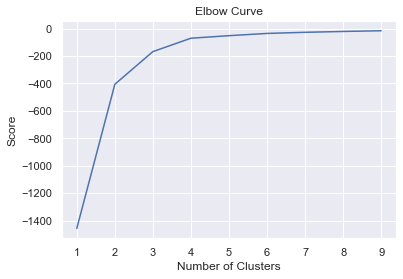

In [5]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['centre.geographic.latitude']]
X_axis = df[['centre.geographic.longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_10412/2880995085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])


,Stop_Number,centre.geographic.latitude,centre.geographic.longitude,cluster_label
0,10615.0,49.89232,-97.14152,1
1,10615.0,49.89232,-97.14152,1
2,10615.0,49.89232,-97.14152,1
3,10615.0,49.89232,-97.14152,1
4,10615.0,49.89232,-97.14152,1
5,10615.0,49.89232,-97.14152,1
6,10615.0,49.89232,-97.14152,1
7,10615.0,49.89232,-97.14152,1
8,10615.0,49.89232,-97.14152,1
9,10615.0,49.89232,-97.14152,1


In [7]:
kmeans = KMeans(n_clusters = 2, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_10412/4132205377.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])


,Stop_Number,centre.geographic.latitude,centre.geographic.longitude,cluster_label
0,10615.0,49.89232,-97.14152,1
1,10615.0,49.89232,-97.14152,1
2,10615.0,49.89232,-97.14152,1
3,10615.0,49.89232,-97.14152,1
4,10615.0,49.89232,-97.14152,1
...,...,...,...,...
806410,20439.0,49.89419,-97.31560,1
806411,20439.0,49.89419,-97.31560,1
806412,20439.0,49.89419,-97.31560,1
806413,20439.0,49.89419,-97.31560,1


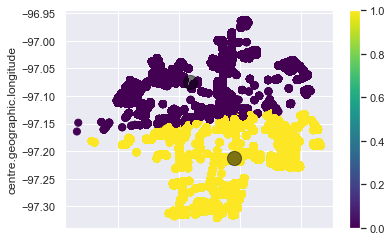

In [8]:
X.plot.scatter(x = 'centre.geographic.latitude', y = 'centre.geographic.longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [9]:
#X.to_csv('Test_Clustering.csv', index=False)

In [10]:
# Based on external visualization on Tableau we have figured out the directional of the stop categories : Eastside and Westside 

X['cluster_label'] = X['cluster_label'].replace(0,'Eastside')
X['cluster_label'] = X['cluster_label'].replace(1,'Westside')

X.rename(columns= {'cluster_label': 'Stop_Location'}, inplace=True)
X

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_10412/1079025902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = X['cluster_label'].replace(0,'Eastside')
C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_10412/1079025902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_label'] = X['cluster_label'].replace(1,'Westside')
D:\Uwinnipeg\Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Stop_Number,centre.geographic.latitude,centre.geographic.longitude,Stop_Location
0,10615.0,49.89232,-97.14152,Westside
1,10615.0,49.89232,-97.14152,Westside
2,10615.0,49.89232,-97.14152,Westside
3,10615.0,49.89232,-97.14152,Westside
4,10615.0,49.89232,-97.14152,Westside
...,...,...,...,...
806410,20439.0,49.89419,-97.31560,Westside
806411,20439.0,49.89419,-97.31560,Westside
806412,20439.0,49.89419,-97.31560,Westside
806413,20439.0,49.89419,-97.31560,Westside


In [11]:
# Joining the data with a main dataframe
# Removing duplicates in the data before merging with the maain dataframe

df = df.merge(X.drop_duplicates(), on='Stop_Number', how='left')

In [12]:
df.drop(columns=['Stop_Number',
        'centre.geographic.latitude_x', 
        'centre.geographic.longitude_x',
        'centre.geographic.longitude_y',
        'centre.geographic.latitude_y'], inplace=True)

In [13]:
# Dropping missing values from the data

df = df.dropna()

# We want to treat Route Number as a categorical column so we're changing its data type to string

df.Route_Number = df.Route_Number.astype('int').astype('str')

In [109]:
# Segregating dataset into features and target and also creating one-hot encoding for categorical variables
# We are dropping certain columns which don't add value to the modelling

features = df.drop(columns=['Delay_Time', 'IsDelayed'])
features = pd.get_dummies(features, drop_first=True)
target = df['IsDelayed']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(features)
features_fs = scaler.transform(features)

# Splitting the dataset 80% training 20% test

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features_fs, target, test_size=0.2, random_state=1)

# Checking splits of test train data

print(f'Features_train shape >> {features_train.shape}')
print(f'target_train shape >> {target_train.shape}')
print(f'features_test shape >> {features_test.shape}')
print(f'target_test shape >> {target_test.shape}')


Features_train shape >> (631368, 112)
target_train shape >> (631368,)
features_test shape >> (157843, 112)
target_test shape >> (157843,)


In [43]:
# Using SelectKBest library of scikit learn feature selection package to find out feature importance
# We are using chi-squared methology for ranking our feature importance

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(features_train, target_train)
features_train_fs = fs.transform(features_train)
features_test_fs = fs.transform(features_test)

In [45]:
feature_importance = pd.Series(fs.scores_,index=features.columns).sort_values(ascending=False)
feature_importance

Route_Number_33           160.746640
Route_Number_12            86.215385
Route_Number_18            55.184671
street.type_Row            45.855115
bus.bike-rack              45.601582
                             ...    
coverage_regular            0.036378
coverage_super express      0.002764
Route_Number_36             0.000058
Route_Number_67             0.000038
Route_Number_98             0.000004
Length: 112, dtype: float64

In [46]:
# Creating an empty list which will capture model names and their accuracy scores
# This will be populated as we run the below function to check test set accuracy scores of each model

model_list = []
accuracy_scores = []

# Creating a function to compute metrics for the model on the test set of the data

def MLMetrics(model_name):
    global model_list
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
    accuracy = accuracy_score(target_test, model_name.predict(features_test), normalize=True)
    precision = precision_score(target_test, model_name.predict(features_test))
    recall = recall_score(target_test, model_name.predict(features_test))
    f1_score = f1_score(target_test, model_name.predict(features_test))

    print('_____________________________________________')
    print(f"accuracy: {accuracy}, \n precision: {precision} , \n recall: {recall} \n f1_score: {f1_score}, \n ")

    #Plotting the confusion matrix

    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    cm = confusion_matrix(target_test, model_name.predict(features_test), labels=model_name.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model_name.classes_)
    model_list.append(str(model_name))
    accuracy_scores.append(accuracy)
    return disp.plot()
    

_____________________________________________
accuracy: 0.9352394467920655, 
 precision: 1.0 , 
 recall: 9.781864423359092e-05 
 f1_score: 0.00019561815336463224, 
 


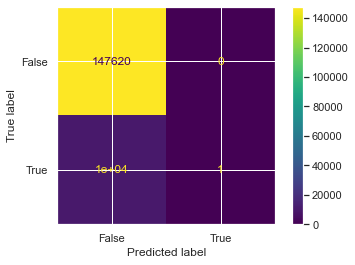

In [47]:
# Logistic REgression Model building and evaluation

from sklearn.linear_model import LogisticRegression

reg_model = LogisticRegression(max_iter=10000).fit(features_train, target_train)
MLMetrics(reg_model)

_____________________________________________
accuracy: 0.9358159690325196, 
 precision: 0.859375 , 
 recall: 0.010760050865695002 
 f1_score: 0.021253985122210415, 
 


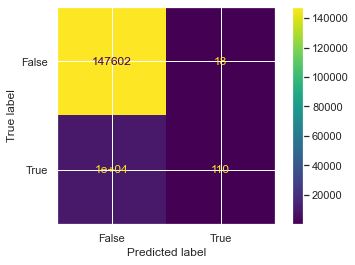

In [49]:
# Hyperparameters: Default

from sklearn.tree import DecisionTreeClassifier
Dec_Tree_1 = DecisionTreeClassifier(random_state=0)
Dec_Tree_1.fit(features_train, target_train)
MLMetrics(Dec_Tree_1)

_____________________________________________
accuracy: 0.9358413106694627, 
 precision: 1.0 , 
 recall: 0.009390589846424728 
 f1_score: 0.018606454113770713, 
 


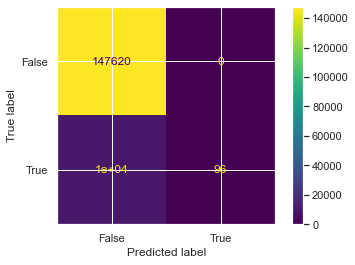

In [50]:
# Decision Tree Model building with Hyperparameters: Max_Depth of the Tree = 10

from sklearn.tree import DecisionTreeClassifier
Dec_Tree_2 = DecisionTreeClassifier(random_state=0, max_depth=10)
Dec_Tree_2.fit(features_train, target_train)
MLMetrics(Dec_Tree_2)

_____________________________________________
accuracy: 0.9357209378939833, 
 precision: 0.9529411764705882 , 
 recall: 0.007923310182920865 
 f1_score: 0.01571594877764843, 
 


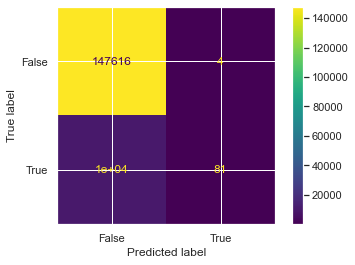

In [51]:
# Decision Tree Model building with Hyperparameters: Max_Depth of the Tree = 10, Minimum Samples in leaf =100

from sklearn.tree import DecisionTreeClassifier
Dec_Tree_3 = DecisionTreeClassifier(random_state=0, max_depth=10,  min_samples_leaf=100)
Dec_Tree_3.fit(features_train, target_train)
MLMetrics(Dec_Tree_3)

_____________________________________________
accuracy: 0.9358476460786984, 
 precision: 1.0 , 
 recall: 0.00948840849065832 
 f1_score: 0.018798449612403102, 
 


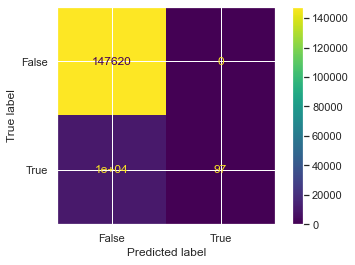

In [52]:
# Decision Tree Model building with Hyperparameters: Max_Depth of the Tree = 10, Minimum Samples in leaf =5, min_samples_split=2

from sklearn.tree import DecisionTreeClassifier
Dec_Tree_4 = DecisionTreeClassifier(random_state=0, min_samples_split=2, min_samples_leaf= 5, max_depth=10)
Dec_Tree_4.fit(features_train, target_train)
MLMetrics(Dec_Tree_4)

D:\Uwinnipeg\Anaconda\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


_____________________________________________
accuracy: 0.2809817350151733, 
 precision: 0.06465157455419249 , 
 recall: 0.7500733639831751 
 f1_score: 0.11904244418915143, 
 


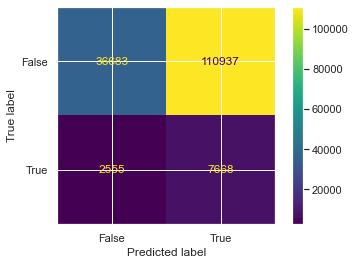

In [53]:
# Kernel = 'Linear', C=1

from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0, max_iter=2000)
SVC1 = model.fit(features_train, target_train)
MLMetrics(SVC1)

_____________________________________________
accuracy: 0.07364913236570517, 
 precision: 0.06499696126411413 , 
 recall: 0.9938374254132838 
 f1_score: 0.12201419495850796, 
 


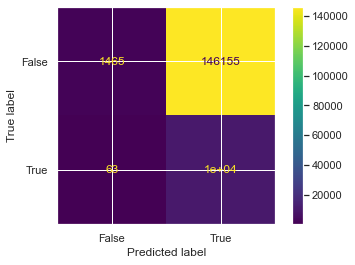

In [54]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(features_train, target_train)
MLMetrics(gnb)

_____________________________________________
accuracy: 0.9358159690325196, 
 precision: 0.823943661971831 , 
 recall: 0.011444781375330138 
 f1_score: 0.022575976845151953, 
 


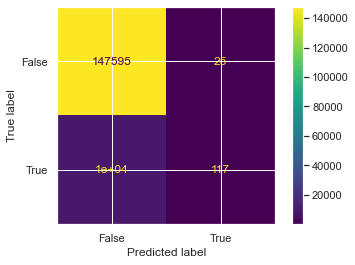

In [55]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RFC1=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RFC1.fit(features_train, target_train)
MLMetrics(RFC1)

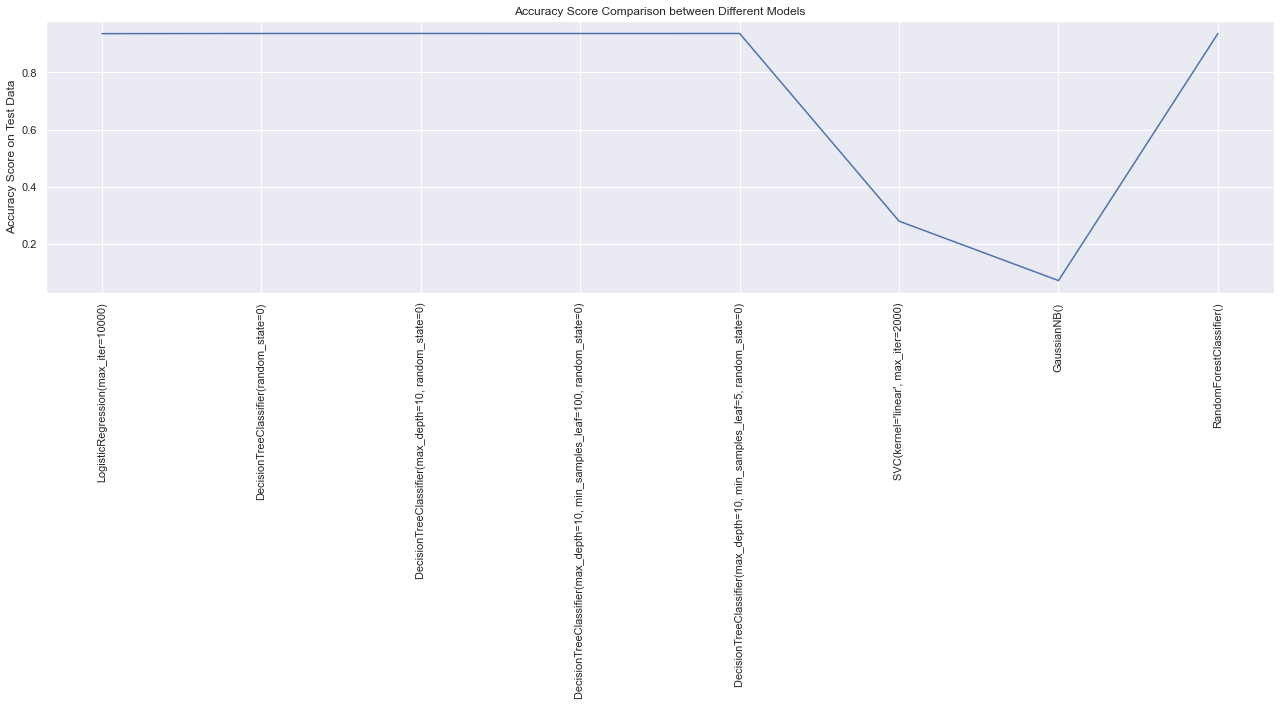

In [56]:
# Plotting Accuracy Scores Comparison for All Models Above


plt.figure(figsize=(22,5))
plt.plot(model_list, accuracy_scores)
plt.ylabel('Accuracy Score on Test Data')
plt.xticks(rotation = 90) 
plt.title('Accuracy Score Comparison between Different Models')
plt.show()

# Predicting Delay Time of the Bus

In [116]:
# Segregating dataset into features and target and also creating one-hot encoding for categorical variables
# We are dropping certain columns which don't add value to the modelling

features = df.drop(columns=['Delay_Time', 'IsDelayed'])
features = pd.get_dummies(features, drop_first=True)
target = df['Delay_Time']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(features)
features_fs = scaler.transform(features)

# Splitting the dataset 80% training 20% test

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(features_fs, target, test_size=0.2, random_state=1)

# Checking splits of test train data

print(f'Features_train shape >> {features_train.shape}')
print(f'target_train shape >> {target_train.shape}')
print(f'features_test shape >> {features_test.shape}')
print(f'target_test shape >> {target_test.shape}')

Features_train shape >> (631368, 112)
target_train shape >> (631368,)
features_test shape >> (157843, 112)
target_test shape >> (157843,)


In [63]:
task_2_model_list = []
task_2_accuracy_scores = []

def Regression_Metrics(model_name):
    global model_list
    
    from sklearn.metrics import mean_squared_error, r2_score
    # MSE quantifies the avaerge distance of actual data points from predicted data points
    # R2 measures how much influence is bmi having on predicted the target
    
    mse = mean_squared_error(target_test, model_name.predict(features_test))
    r2 = r2_score(target_test, model_name.predict(features_test))

    print(f"mse: {mse}, r2: {r2}")
    
    task_2_model_list.append(str(model_name))
    task_2_accuracy_scores.append(mse)

In [64]:
# Importing Linear Regression library from sklearn
from sklearn.linear_model import LinearRegression

# Fitting the regression equation on the train data

reg1 = LinearRegression().fit(features_train, target_train)

Regression_Metrics(reg1)

mse: 0.060470270232415566, r2: 0.0016817719449537805


In [65]:
from sklearn.linear_model import SGDRegressor

sgd1 = SGDRegressor(max_iter=10000, tol=1e-3, random_state=0, penalty='none').fit(features_train, target_train)
Regression_Metrics(sgd1)

mse: 0.06050553492405851, r2: 0.0010995786731429202


In [69]:
from sklearn.neural_network import MLPRegressor
MLP1 = MLPRegressor()
MLP1.fit(features_train, target_train)
Regression_Metrics(MLP1)

mse: 0.05982053951261795, r2: 0.012408332590511773


In [139]:
features_train=np.reshape(features_train, (-1,1))
features_test=np.reshape(features_test, (-1,1))

In [152]:
model = Sequential()
# Input Layer = Number of features in the training set + 1
model.add(Dense(113, input_dim=113, kernel_initializer='normal', activation='relu'))

# Hidden Layer = Training Data Samples/Factor * (Input Neurons + Output Neurons)
model.add(Dense(5587, activation='relu'))

model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 113)               12882     
_________________________________________________________________
dense_22 (Dense)             (None, 5587)              636918    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5588      
Total params: 655,388
Trainable params: 655,388
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(features_train, target_train, epochs=30, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(features_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 56570572
  y sizes: 631368
Make sure all arrays contain the same number of samples.

In [126]:
target_train.shape

(631368,)

In [121]:
np.reshape(features_train(-1,1))

TypeError: 'numpy.ndarray' object is not callable

In [149]:
import tensorflow as tf
features_train = tf.stack(features_train)
target_train = tf.stack(target_train)

In [150]:
target_train

<tf.Tensor: shape=(631368,), dtype=float64, numpy=array([  0.,   0.,   0., ...,   0., 235.,   0.])>